**KAUSTUBH SHIRSATH**

**18NA10011**

**DEEP LEARNING ASSIGNMENT 1 A**

## Fully Connected Neural Network

In [69]:
# Importing all the necessary libraries
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import torch.optim as optim

from torchvision import transforms, datasets

In [70]:
class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(784, 100) # 28*28 input, 10*10 output
        self.fc2 = nn.Linear(100, 10)  #  1*100 input, 1*10 output
        self.sigmoid  = nn.Sigmoid()   # Hidden layer activation

    def forward(self, x):
        x = self.fc1(x) #  Hidden layer 1
        x = self.sigmoid(x) # apply sigmoid to first hidden layer
        x = self.fc2(x) # Output layer
        x = F.softmax(x, dim=1) # apply softmax to output layer
        return x


In [71]:
# initializing some parameters
n_epochs = 6
batchsize = 128
learning_rate = 0.1

# initializing the network
net = FFNN()
optimizer = optim.SGD(net.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()


In [72]:
# Normalized the dataset (Mean of MNIST dataset: 0.1307, Std of MNIST dataset: 0.3081)
apply_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
trainset = datasets.MNIST(root="./data", train = True, download = True, transform=apply_transform)  # import training data
testset = datasets.MNIST(root="./data", train = False, download = True, transform = apply_transform) #import test data
trainLoader = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=4, batch_size = batchsize) # Loader for training set
testLoader = torch.utils.data.DataLoader(testset, shuffle=True, num_workers=4, batch_size= batchsize) # Loader for testing set

In [73]:
# arrays to store the results for further visualization
training_loss = []
testing_loss = []
testing_accuracy = []
training_accuracy = []

In [74]:
# training loop
def train(epoch):
    net.train()
    total_loss = 0
    correct, all = 0, 0
    for batch_idx, (data, target) in enumerate(trainLoader):
        # setting gradients to zero
        optimizer.zero_grad()
        # reshaping data to match with input
        _d = data.view(data.shape[0], -1)
        
        # forward
        output = net(_d)
        loss = criterion(output, target)
        
        # backpropagation of error
        loss.backward()
        total_loss += loss.item()
        
        # optimizer step
        optimizer.step()
        
        # calculating accuracy
        _, pred = output.max(1)
        correct += (pred==target).sum()
        all += output.size(0)
    else:
        print("Training: \tEpoch: {} \t Loss: {}".format(epoch, total_loss/len(trainLoader)), 
             "\tAccuracy: {}".format((correct/all).item()))
        training_loss.append(total_loss/len(trainLoader))
        training_accuracy.append((correct/all).item())

            

In [75]:
# testing the model and calculating accuracy 
def test():
    net.eval()
    correct, all = 0,0
    total_loss = 0
    for data, target in testLoader:
        # reshaping the data to match input shape
        img = data.reshape(data.shape[0], -1)
        
        # getting model output
        with torch.no_grad():
            scores = net(img)
            
        # calculating accuracy
        _, pred = scores.max(1)
        correct += (pred==target).sum()
        all+=pred.size(0)
        
        # calculating loss
        loss = criterion(scores, target)
        total_loss += loss.sum().item()
    
    # printing the results
    print("Test Accuracy: ", (correct/all).item())
    print("Loss: ", total_loss/len(testLoader))
    testing_accuracy.append((correct/all).item())
    testing_loss.append(total_loss/len(testLoader))

In [76]:
for epoch in range(1, n_epochs+1):
    train(epoch)
    test()

Training: 	Epoch: 1 	 Loss: 2.1179228413587947 	Accuracy: 0.3853999972343445
Test Accuracy:  0.6707000136375427
Loss:  1.9073879748960085
Training: 	Epoch: 2 	 Loss: 1.808010805898638 	Accuracy: 0.7222833037376404
Test Accuracy:  0.7475000023841858
Loss:  1.7535385994971553
Training: 	Epoch: 3 	 Loss: 1.7422174479661465 	Accuracy: 0.7472166419029236
Test Accuracy:  0.7573000192642212
Loss:  1.725281000137329
Training: 	Epoch: 4 	 Loss: 1.724905806817988 	Accuracy: 0.7544000148773193
Test Accuracy:  0.7605999708175659
Loss:  1.7156704573691646
Training: 	Epoch: 5 	 Loss: 1.715307376532158 	Accuracy: 0.7580500245094299
Test Accuracy:  0.7627000212669373
Loss:  1.7044105393977105
Training: 	Epoch: 6 	 Loss: 1.6707479407284052 	Accuracy: 0.8265666961669922
Test Accuracy:  0.8443999886512756
Loss:  1.6484971393512775


In [77]:
#testing our model on some data

images, labels = next(iter(testLoader))
img = images[0].view(1, 784)
with torch.no_grad():
    logps = net(img)

ps = torch.exp(logps)
prob = list(ps.numpy()[0])
print("Model Prediction: ", prob.index(max(prob)))
print("True label: ", labels[0].item())


Model Prediction:  4
True label:  4


## PART 5

## Draw graph showing the loss vs epoch.

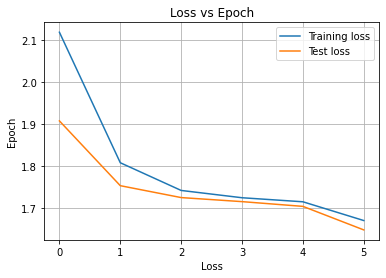

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting training and test losses

plt.plot(training_loss, label='Training loss')
plt.plot(testing_loss, label="Test loss")
plt.legend()
plt.grid()
plt.title("Loss vs Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.show()



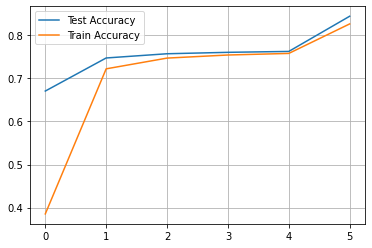

In [79]:
#plotting train and test accuracy

plt.plot(testing_accuracy, label='Test Accuracy')
plt.plot(training_accuracy, label='Train Accuracy')
plt.legend()
plt.grid()
plt.show()


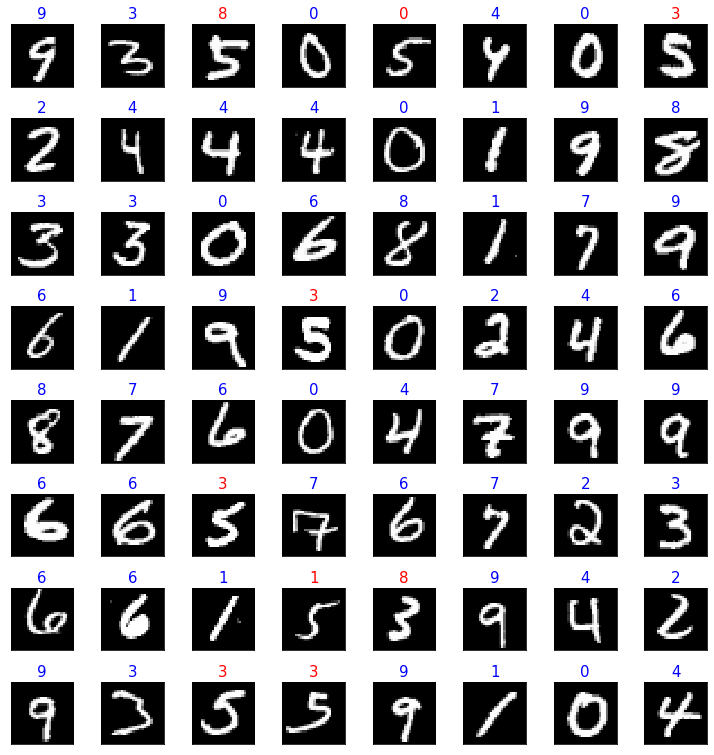

In [80]:
# visualizing a bunch of images (64) with model prediction

# ( Red label indicates wrong prediction, blue label represents correct prediction)

images, labels = next(iter(testLoader))
_d = images.view(images.shape[0], -1)

with torch.no_grad():
    preds = net(_d)

images_np = [i.mean(dim=0).numpy() for i in images]
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap='gray', interpolation = 'nearest')
    color = "blue" if labels[i] == torch.max(preds[i], 0)[1] else "red"
    plt.title(class_names[torch.max(preds[i], 0)[1]], color = color, fontsize=15)


## PART 6 A

## Draw the learning curve showing how train and test error vary with increase in batch size

In [81]:
# batch size vs error

batchsize = 16
errors = []
n_epochs = 1

for i in range(1, 10):
    # setting up different loaders for train and test set
    trainLoader = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=4, batch_size = batchsize*i)
    testLoader = torch.utils.data.DataLoader(testset, shuffle=True, num_workers=4, batch_size= batchsize*i)
    net = FFNN()
    for epoch in range(1, n_epochs+1):
        train(epoch)
    
    net.eval()
    correct, all = 0,0
    total_loss = 0
    for data, target in testLoader:
        # reshaping the data to match input shape
        img = data.reshape(data.shape[0], -1)
    
        # getting model output
        with torch.no_grad():
            scores = net(img)

        # calculating loss
        loss = criterion(scores, target)
        total_loss += loss.sum().item()
    # printing the results
    errors.append(total_loss/len(testLoader))
    print("Batch size: ", batchsize*i, "\tError: ", errors[-1])
    
    

Training: 	Epoch: 1 	 Loss: 2.3021460299173993 	Accuracy: 0.10441666841506958
Batch size:  16 	Error:  2.3023526081085204
Training: 	Epoch: 1 	 Loss: 2.3033620354970297 	Accuracy: 0.08088333159685135
Batch size:  32 	Error:  2.3032855759032618
Training: 	Epoch: 1 	 Loss: 2.30346712474823 	Accuracy: 0.10384999960660934
Batch size:  48 	Error:  2.3033027432181616
Training: 	Epoch: 1 	 Loss: 2.3034760471600206 	Accuracy: 0.10056667029857635
Batch size:  64 	Error:  2.303260332459857
Training: 	Epoch: 1 	 Loss: 2.3038472588857015 	Accuracy: 0.08221666514873505
Batch size:  80 	Error:  2.303714593887329
Training: 	Epoch: 1 	 Loss: 2.302482350921631 	Accuracy: 0.10836666822433472
Batch size:  96 	Error:  2.302191500436692
Training: 	Epoch: 1 	 Loss: 2.30416077953666 	Accuracy: 0.07581666857004166
Batch size:  112 	Error:  2.3043353186713325
Training: 	Epoch: 1 	 Loss: 2.3006823983019604 	Accuracy: 0.10916666686534882
Batch size:  128 	Error:  2.3007151326046715
Training: 	Epoch: 1 	 Loss: 2.

In [82]:
print(errors)

[2.3023526081085204, 2.3032855759032618, 2.3033027432181616, 2.303260332459857, 2.303714593887329, 2.302191500436692, 2.3043353186713325, 2.3007151326046715, 2.302402172769819]


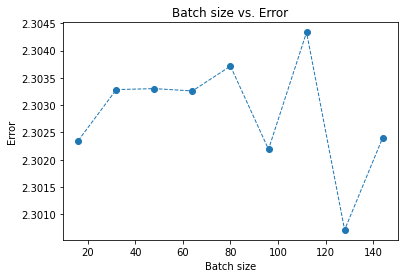

In [83]:
plt.title("Batch size vs. Error")
plt.xlabel("Batch size")
plt.ylabel("Error")
plt.plot([16, 32, 48, 64, 80, 96, 112, 128, 144], errors, marker='o', linestyle='dashed', linewidth=1, markersize=6)
plt.show()

## PART 6C

####Now instead of keeping learning rate fixed for the complete training, vary your learning rate with number of epochs (you can take any learning rate value and decrease it as per your choice). Observe rate of convergence of model. Write your observation in brief.

In [84]:
# learning rate vs test error

trainLoader = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=4, batch_size = 64)
testLoader = torch.utils.data.DataLoader(testset, shuffle=True, num_workers=4, batch_size= 64)

learning_rates = [0.025, 0.05, 0.1, 0.2, 0.5]
errors = []
n_epochs = 5

for learning_rate in learning_rates:
    net = FFNN()
    optimizer = optim.SGD(net.parameters(), lr = learning_rate)
    for epoch in range(1, n_epochs+1):
        train(epoch)
    
    net.eval()
    correct, all = 0,0
    total_loss = 0
    for data, target in testLoader:
        # reshaping the data to match input shape
        img = data.reshape(data.shape[0], -1)
    
        # getting model output
        with torch.no_grad():
            scores = net(img)

        # calculating loss
        loss = criterion(scores, target)
        total_loss += loss.sum().item()
    # printing the results
    errors.append(total_loss/len(testLoader))
    print("Learning rate: ", learning_rate, "\tError: ", errors[-1])
    


Training: 	Epoch: 1 	 Loss: 2.222814050564634 	Accuracy: 0.25110000371932983
Training: 	Epoch: 2 	 Loss: 2.022429618372846 	Accuracy: 0.5285833477973938
Training: 	Epoch: 3 	 Loss: 1.892283822173503 	Accuracy: 0.6316666603088379
Training: 	Epoch: 4 	 Loss: 1.843183508686928 	Accuracy: 0.6510833501815796
Training: 	Epoch: 5 	 Loss: 1.799568855304962 	Accuracy: 0.7040500044822693
Learning rate:  0.025 	Error:  1.7635114443529942
Training: 	Epoch: 1 	 Loss: 2.1305174207382365 	Accuracy: 0.3674499988555908
Training: 	Epoch: 2 	 Loss: 1.829890149615721 	Accuracy: 0.7297333478927612
Training: 	Epoch: 3 	 Loss: 1.6945619583129883 	Accuracy: 0.8207166790962219
Training: 	Epoch: 4 	 Loss: 1.6615917397968805 	Accuracy: 0.8319666385650635
Training: 	Epoch: 5 	 Loss: 1.6474433526047256 	Accuracy: 0.837233304977417
Learning rate:  0.05 	Error:  1.636535967231556
Training: 	Epoch: 1 	 Loss: 1.983183962704022 	Accuracy: 0.5261833071708679
Training: 	Epoch: 2 	 Loss: 1.8004063893991238 	Accuracy: 0.67

In [85]:
print(errors)

[1.7635114443529942, 1.636535967231556, 1.5968685431085574, 1.5359619316781403, 1.5154397183922446]


## PART 6 B

### Plot the test error vs learning rate for each of the model. Vary the learning rates as 0.025, 0.05, 0.1, 0.2 and 0.5. Which learning rate would you prefer for this problem and why? (write this answer in your python notebook itself.)

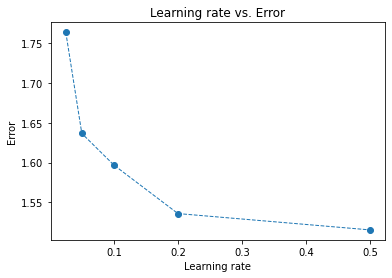

In [86]:
plt.title("Learning rate vs. Error")
plt.xlabel("Learning rate")
plt.ylabel("Error")
plt.plot(learning_rates, errors, marker='o', linestyle='dashed', linewidth=1, markersize=6)
plt.show()

# CONCLUSION

### From the above graph, it is visible that the model error is lowest when learning rate is 0.5 in this case. So, we should take the learning rate as 0.5 for better accuracy of our model